In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
from keras.datasets import mnist

# Load data (train and test splits)
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

print(f"Training samples: {x_train_full.shape[0]}, Test samples: {x_test.shape[0]}")


Training samples: 60000, Test samples: 10000


In [11]:
x_valid = x_train_full[:5000]/255.0
y_valid = y_train_full[:5000]
x_train = x_train_full[5000:]/255.0
y_train = y_train_full[5000:]
x_test = x_test/255.0

In [12]:
print(f'shape of training {x_train.shape} validation {x_valid.shape} testing {x_test.shape}')

shape of training (55000, 28, 28) validation (5000, 28, 28) testing (10000, 28, 28)


3


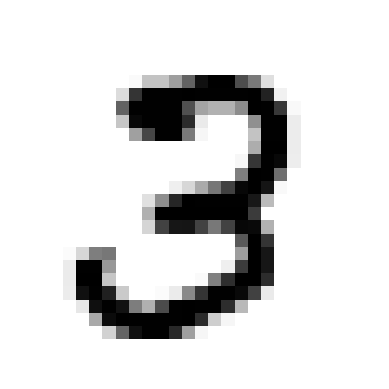

In [13]:
plt.imshow(x_train[41],cmap='binary')
print(y_train[41])
plt.axis('off')
plt.show()

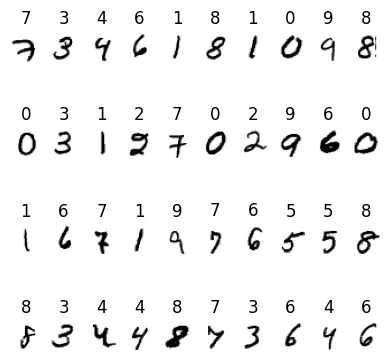

In [14]:
n_row = 4
n_col = 10

plt.figure(figsize=(n_row*1.2,n_col*0.5))

for row in range(n_row):
    for col in range(n_col):
        index = row*n_col + col
        plt.subplot(n_row,n_col,index+1)
        plt.imshow(x_train[index],cmap='binary')
        plt.axis('off')
        plt.title(f'{y_train[index]}',fontsize=12)
    plt.subplots_adjust(wspace=0.2,hspace=0)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPool2D,Input,BatchNormalization

In [16]:
model = Sequential()


model.add(Input(shape=(28,28,1)))
model.add(Conv2D(16,kernel_size=(2,2), padding='same'))

model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(10, activation='softmax'))

model.compile(loss = "sparse_categorical_crossentropy", optimizer='Adamax',metrics=['accuracy'])
print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,608,570 (6.14 MB)

 Trainable params: 1,608,538 (6.14 MB)

 Non-trainable params: 32 (128.00 B)

None


In [17]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8343 - loss: 0.5204 - val_accuracy: 0.9646 - val_loss: 0.1316
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9219 - loss: 0.2515 - val_accuracy: 0.9734 - val_loss: 0.0922
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9407 - loss: 0.1916 - val_accuracy: 0.9764 - val_loss: 0.0844
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9486 - loss: 0.1610 - val_accuracy: 0.9784 - val_loss: 0.0763
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9570 - loss: 0.1380 - val_accuracy: 0.9782 - val_loss: 0.0756
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9599 - loss: 0.1254 - val_accuracy: 0.9810 - val_loss: 0.0704
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9629 - loss: 0.1173 - val_accuracy: 0.9802 - val_loss: 0.0679
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9663 - loss: 0

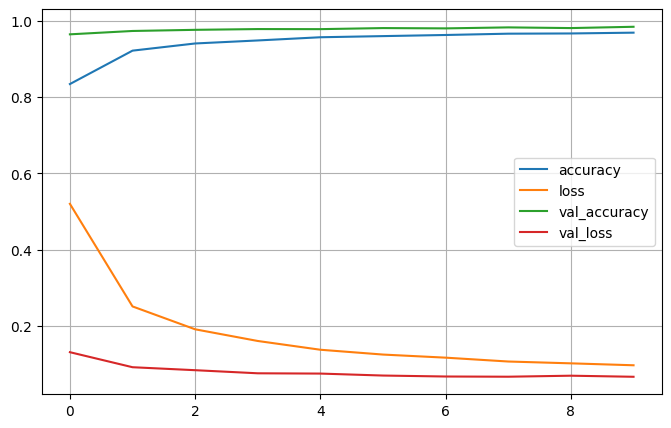

In [18]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [19]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9838 - loss: 0.0571


[0.05711342766880989, 0.9837999939918518]

In [20]:
x_new = x_test[3:6]
y_new = y_test[3:6]
y_pred = np.argmax(model.predict(x_new),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


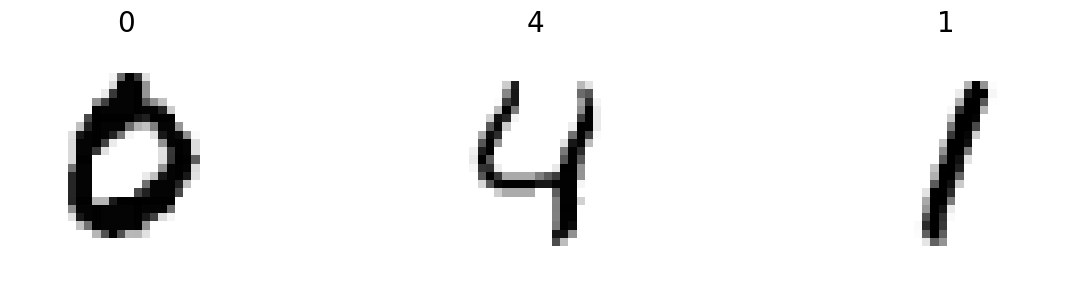

In [21]:
rows = 1
cols = 3
plt.figure(figsize=(5*cols,rows*3))
for row in range(rows):
    for col in range(cols):
        index = cols*row + col
        plt.subplot(rows,cols,index+1)
        plt.imshow(x_new[index],cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(y_pred[index],fontsize = 20)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()